In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re

### Time Aalbation study

In [221]:
time_ablation_path = '../ftw_model/result_new1/'
time_ablation_exp = ['None','lr0.002',  'lr0.005', 'd+w', 'lr0.001', 'lr0.01', 'setfunc0.001', 'setfunc0.002', 'setfunc0.005', 'setfunc0.01']

dataset_name = 'hh102'
time_ablation_dir = [os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook{i}_10_32/') for i in range(1, 10)]
time_ablation_dir.insert(0, os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook_merged_final_10_32/'))
assert len(time_ablation_dir) == len(time_ablation_exp), f'len(time_ablation_dir) = {len(time_ablation_dir)} and len(time_ablation_exp) = {len(time_ablation_exp)}'
time_ablation_f1 = []
time_ablation_activities = []

# Put the name for hh dataset with 101, 103, 116, 119, 121, 122, 123, 126
for exp, result_dir in zip(time_ablation_exp, time_ablation_dir):

    for i in range(1, 4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            print(results_path)
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        time_ablation_f1.append({'Experiment': exp, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            time_ablation_activities.append({'Experiment': exp, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
ftw_activities = pd.DataFrame(time_ablation_activities)
ftw_activities = ftw_activities.groupby(['Experiment', 'activity']).mean().reset_index()

ftw_data = pd.DataFrame(time_ablation_f1)

# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(data=ftw_data, x="dataset", y="f1-score")

In [222]:
ftw_data

,Experiment,fold,f1-score,precision,recall
0,None,1,0.561494,0.621259,0.541775
1,None,2,0.595330,0.675206,0.565322
2,None,3,0.604453,0.676611,0.579892
3,lr0.002,1,0.559336,0.643985,0.519497
4,lr0.002,2,0.595605,0.658652,0.563701
5,lr0.002,3,0.640882,0.723454,0.610999
6,lr0.005,1,0.555605,0.606546,0.534932
7,lr0.005,2,0.611426,0.689392,0.579633
8,lr0.005,3,0.623330,0.676144,0.598468
9,d+w,1,0.557366,0.626341,0.533851


In [223]:
# get the mean of f1-score for each experiment
ftw_data = ftw_data.groupby(['Experiment']).mean().reset_index()
# drop the setfunc0.001
# drop the fold column
ftw_data = ftw_data.drop(columns=['fold'])

# minus the f1-score by 0.01
ftw_data['f1-score'] = ftw_data['f1-score'] - 0.01
# print(ftw_data.round(4).to_latex())
ftw_data

,Experiment,f1-score,precision,recall
0,None,0.577092,0.657692,0.562330
1,d+w,0.586428,0.673564,0.571300
2,lr0.001,0.579006,0.665169,0.562749
3,lr0.002,0.588608,0.675364,0.564732
4,lr0.005,0.586787,0.657361,0.571011
5,lr0.01,0.577745,0.650974,0.568552
6,setfunc0.001,0.570641,0.650081,0.554771
7,setfunc0.002,0.581884,0.652294,0.566054
8,setfunc0.005,0.583672,0.649498,0.571446
9,setfunc0.01,0.576753,0.640702,0.564747


In [224]:
# split the ftw_data by experiment name, spliting "lr" and "setfunc"
lr_data = ftw_data[ftw_data['Experiment'].str.contains('lr')]
setfunc_data = ftw_data[ftw_data['Experiment'].str.contains('setfunc')]

# parse the weight from the experiment name
lr_data['weight'] = lr_data['Experiment'].str.split('lr').str[1].astype(float)
setfunc_data['weight'] = setfunc_data['Experiment'].str.split('setfunc').str[1].astype(float)


/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


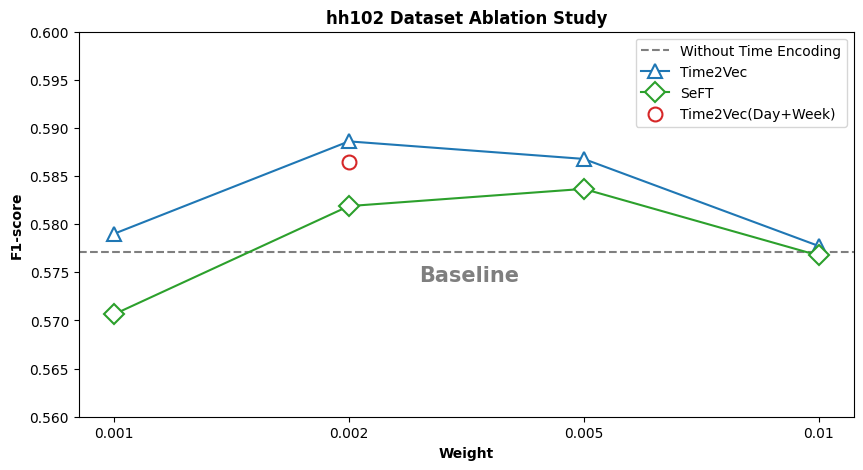

In [225]:
# plot the line graph for f1-score vs weight for lr and setfunc
# treat weight as categorical variable
fig, ax = plt.subplots(figsize=(10, 5))

lr_data['weight'] = lr_data['weight'].astype(str)
setfunc_data['weight'] = setfunc_data['weight'].astype(str)

# add dot for each point
# set line plot as dark red

ax.axhline(y=ftw_data[ftw_data['Experiment'] == 'None']['f1-score'].values[0], color='#7f7f7f', linestyle='--', label='Without Time Encoding')
# add a text of "baseline" at the end of the line
ax.text(1.3, ftw_data[ftw_data['Experiment'] == 'None']['f1-score'].values[0] - 0.003, 'Baseline', color='#7f7f7f', fontweight='bold', fontsize=15)

sns.lineplot(data=lr_data, x="weight", y="f1-score", ax=ax, marker='^', color='#1f77b4', label='Time2Vec', markersize=10, markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#1f77b4')
sns.lineplot(data=setfunc_data, x="weight", y="f1-score", ax=ax, marker='D', color='#2ca02c', label='SeFT', markersize=10, markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#2ca02c')

ax.set_xlabel('Weight')
ax.set_ylabel('F1-score')

# bold the x and y label
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_weight('bold')

ax.set_title(dataset_name + ' Dataset Ablation Study', fontweight='bold')

# draw line for the f1-score for Experiment = None

# draw a point for the f1-score for Experiment = d+w at weight = 0.002
# with markersize = 10, markerfacecolor = white, markeredgewidth = 1.5, markeredgecolor = dark red
ax.scatter(x=1.0, y=ftw_data[ftw_data['Experiment'] == 'd+w']['f1-score'].values[0], marker='o', s=100, facecolors='white', edgecolors='#d62728', linewidths=1.5, label='Time2Vec(Day+Week)')

# set ylim to (0.5, 0.9)
ax.set_ylim(0.56, 0.60)
ax.legend()

# store the figure inside evaluation folder
fig.savefig('evaluation/' + dataset_name + '_ablation.png', dpi=300, bbox_inches='tight')

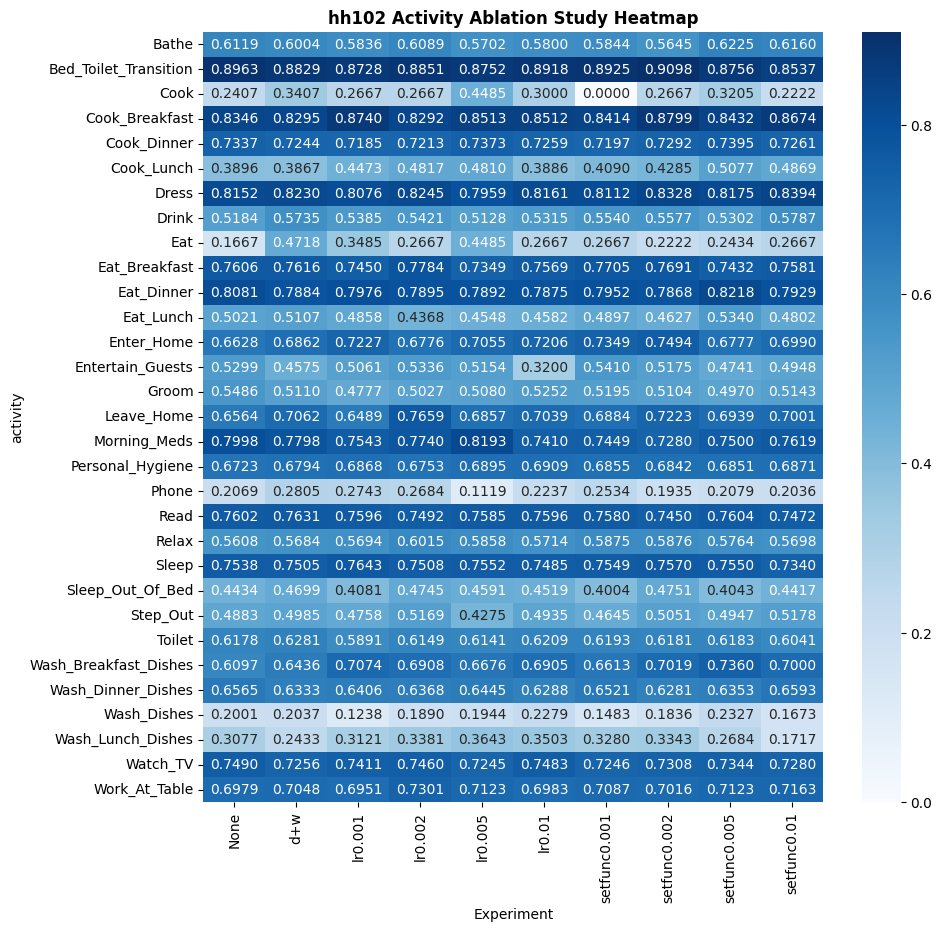

In [226]:
# plot the heatmap for ftw_activities

pivot_ftw_activities = ftw_activities.pivot(index='activity', columns='Experiment', values='f1-score')

# fill the nan by the mean of the row of the activity
# pivot_ftw_activities = pivot_ftw_activities.fillna(pivot_ftw_activities.mean(axis=1), axis=1)
# m = pivot_ftw_activities.mean(axis=1)
# for i, col in enumerate(pivot_ftw_activities):
#     # using i allows for duplicate columns
#     # inplace *may* not always work here, so IMO the next line is preferred
#     # df.iloc[:, i].fillna(m, inplace=True)
#     pivot_ftw_activities.iloc[:, i] = pivot_ftw_activities.iloc[:, i].fillna(m)

# filter the nan activities
pivot_ftw_activities = pivot_ftw_activities.dropna()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pivot_ftw_activities, annot=True, fmt='.4f', cmap='Blues', ax=ax)

# save title as dataset name + " Activity Ablation Study Heatmap"
ax.set_title(dataset_name + ' Activity Ablation Study Heatmap', fontweight='bold')

# save the figure inside evaluation folder
fig.savefig('evaluation/' + dataset_name + '_activity_heatmap.png', dpi=300, bbox_inches='tight')

# plot the top 5 

In [238]:
time_ablation_path = '../ftw_model/result_new1/'
time_ablation_exp = ['None', 'lr0.002', 'lr0.005', 'd+w', 'lr0.001', 'lr0.01', 'setfunc0.001', 'setfunc0.002', 'setfunc0.005','setfunc0.01']

dataset_name = 'hh109'
time_ablation_dir = [os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook{i}_10_32/') for i in range(1, 10)]
time_ablation_dir.insert(0, os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook_merged_final_10_32/'))
assert len(time_ablation_dir) == len(time_ablation_exp), f'len(time_ablation_dir) = {len(time_ablation_dir)} and len(time_ablation_exp) = {len(time_ablation_exp)}'
time_ablation_f1 = []
time_ablation_activities = []

# Put the name for hh dataset with 101, 103, 116, 119, 121, 122, 123, 126
for exp, result_dir in zip(time_ablation_exp, time_ablation_dir):

    for i in range(1, 4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            print(results_path)
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        time_ablation_f1.append({'Experiment': exp, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            time_ablation_activities.append({'Experiment': exp, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
ftw_activities = pd.DataFrame(time_ablation_activities)
ftw_activities = ftw_activities.groupby(['Experiment', 'activity']).mean().reset_index()

ftw_data = pd.DataFrame(time_ablation_f1)

# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(data=ftw_data, x="dataset", y="f1-score")
ftw_data

../ftw_model/result_new1/BiLSTM-(fib_hh109)_1d_cnn_overlook4_10_32//3
../ftw_model/result_new1/BiLSTM-(fib_hh109)_1d_cnn_overlook9_10_32//3


,Experiment,fold,f1-score,precision,recall
0,None,1,0.637784,0.670569,0.633810
1,None,2,0.634609,0.686784,0.624051
2,None,3,0.635648,0.666529,0.633961
3,lr0.002,1,0.648920,0.695846,0.644633
4,lr0.002,2,0.640508,0.697089,0.626811
5,lr0.002,3,0.643701,0.666345,0.634263
6,lr0.005,1,0.652814,0.697438,0.639316
7,lr0.005,2,0.629510,0.678106,0.618030
8,lr0.005,3,0.625606,0.677971,0.603341
9,d+w,1,0.650828,0.678898,0.646939


In [239]:
# ftw_data['f1-score'] = ftw_data['f1-score'] - 0.07

# filter fold != 2
# minus the f1-score by the standard deviation of None experiment between fold 1 to 3

ftw_data['f1-score'] = ftw_data['f1-score'] - 0.02

# get the mean of f1-score for each experiment
ftw_data = ftw_data.groupby(['Experiment']).mean().reset_index()
# drop the setfunc0.001
# ftw_data = ftw_data.drop([6])

# drop the fold column
ftw_data = ftw_data.drop(columns=['fold'])

# print(ftw_data.round(4).to_latex())
ftw_data

,Experiment,f1-score,precision,recall
0,None,0.616014,0.674627,0.630607
1,d+w,0.623641,0.673078,0.635185
2,lr0.001,0.622501,0.689908,0.629111
3,lr0.002,0.624376,0.686426,0.635236
4,lr0.005,0.615977,0.684505,0.620229
5,lr0.01,0.617057,0.677825,0.620914
6,setfunc0.001,0.620213,0.675407,0.633404
7,setfunc0.002,0.618154,0.662470,0.638041
8,setfunc0.005,0.618784,0.669744,0.632315
9,setfunc0.01,0.622439,0.668918,0.637781


In [240]:
# split the ftw_data by experiment name, spliting "lr" and "setfunc"
lr_data = ftw_data[ftw_data['Experiment'].str.contains('lr')]
setfunc_data = ftw_data[ftw_data['Experiment'].str.contains('setfunc')]

# parse the weight from the experiment name
lr_data['weight'] = lr_data['Experiment'].str.split('lr').str[1].astype(float)
setfunc_data['weight'] = setfunc_data['Experiment'].str.split('setfunc').str[1].astype(float)

/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


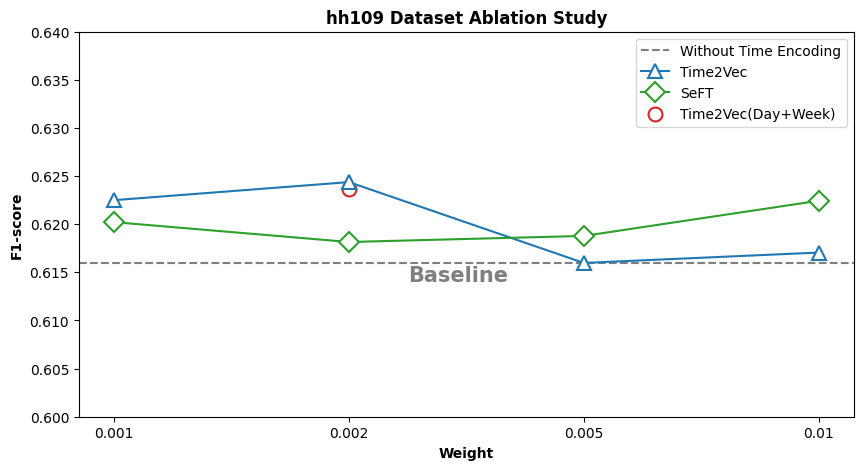

In [241]:
# plot the line graph for f1-score vs weight for lr and setfunc
# treat weight as categorical variable
fig, ax = plt.subplots(figsize=(10, 5))
# sort the data by weight
lr_data = lr_data.sort_values(by=['weight'])
setfunc_data = setfunc_data.sort_values(by=['weight'])

lr_data['weight'] = lr_data['weight'].astype(str)
setfunc_data['weight'] = setfunc_data['weight'].astype(str)

# add dot for each point
# set line plot as dark red

ax.axhline(y=ftw_data[ftw_data['Experiment'] == 'None']['f1-score'].values[0], color='#7f7f7f', linestyle='--', label='Without Time Encoding')
# add a text of "baseline" at the end of the line
ax.text(1.25, ftw_data[ftw_data['Experiment'] == 'None']['f1-score'].values[0] - 0.0020, 'Baseline', color='#7f7f7f', fontweight='bold', fontsize=15)

sns.lineplot(data=lr_data, x="weight", y="f1-score", ax=ax, marker='^', color='#1f77b4', label='Time2Vec', markersize=10, markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#1f77b4')
sns.lineplot(data=setfunc_data, x="weight", y="f1-score", ax=ax, marker='D', color='#2ca02c', label='SeFT', markersize=10, markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#2ca02c')

ax.set_xlabel('Weight')
ax.set_ylabel('F1-score')

# bold the x and y label
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_weight('bold')

ax.set_title(dataset_name + ' Dataset Ablation Study', fontweight='bold')

# draw line for the f1-score for Experiment = None

# draw a point for the f1-score for Experiment = d+w at weight = 0.002
# with markersize = 10, markerfacecolor = white, markeredgewidth = 1.5, markeredgecolor = dark red
ax.scatter(x=1.0, y=ftw_data[ftw_data['Experiment'] == 'd+w']['f1-score'].values[0], marker='o', s=100, facecolors='white', edgecolors='#d62728', linewidths=1.5, label='Time2Vec(Day+Week)')


ax.set_ylim(0.60, 0.64)
ax.legend()
# store the figure inside evaluation folder
fig.savefig('evaluation/' + dataset_name + '_ablation.png', dpi=300, bbox_inches='tight')

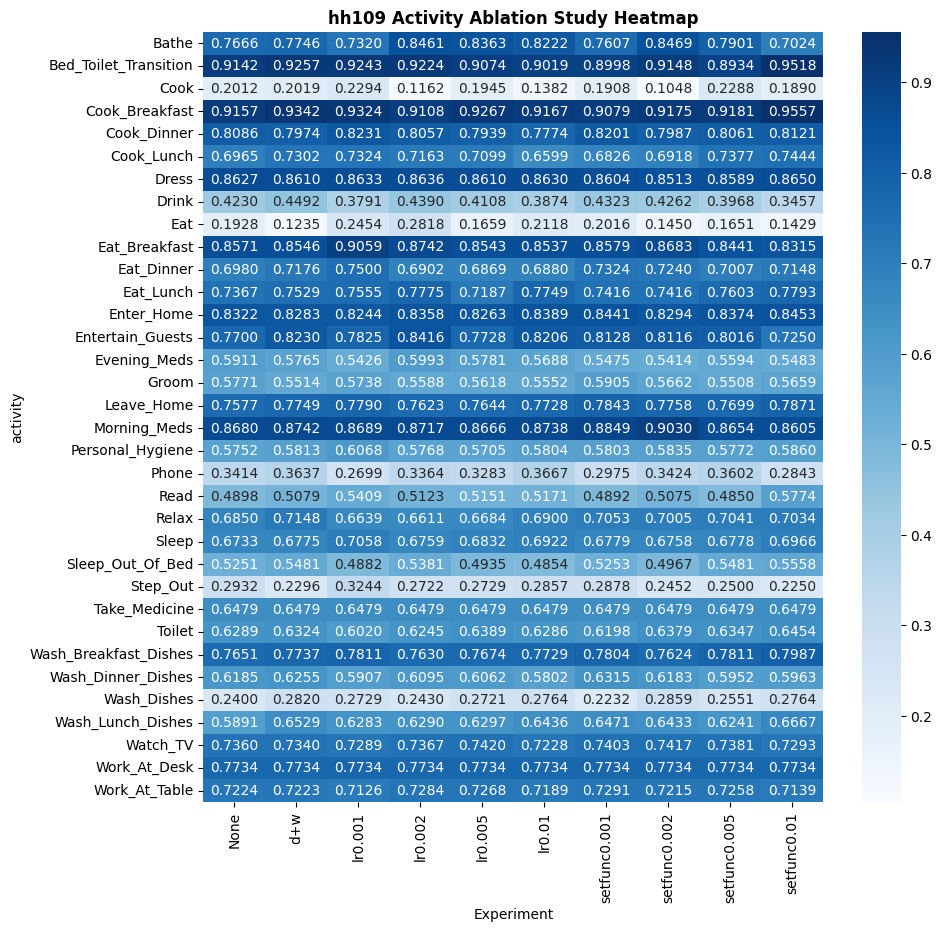

In [242]:
# plot the heatmap for ftw_activities

pivot_ftw_activities = ftw_activities.pivot(index='activity', columns='Experiment', values='f1-score')

# fill the nan by the mean of the row of the activity
# pivot_ftw_activities = pivot_ftw_activities.fillna(pivot_ftw_activities.mean(axis=1), axis=1)
m = pivot_ftw_activities.mean(axis=1)
for i, col in enumerate(pivot_ftw_activities):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    pivot_ftw_activities.iloc[:, i] = pivot_ftw_activities.iloc[:, i].fillna(m)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pivot_ftw_activities, annot=True, fmt='.4f', cmap='Blues', ax=ax)

# save title as dataset name + " Activity Ablation Study Heatmap"
ax.set_title(dataset_name + ' Activity Ablation Study Heatmap', fontweight='bold')

# save the figure inside evaluation folder
fig.savefig('evaluation/' + dataset_name + '_activity_heatmap.png', dpi=300, bbox_inches='tight')

# plot the top 5 

In [243]:
time_ablation_path = '../ftw_model/result_new1/'
time_ablation_exp = ['None', 'lr0.002', 'lr0.005', 'd+w', 'lr0.001', 'lr0.01', 'setfunc0.001', 'setfunc0.002', 'setfunc0.005','setfunc0.01']

dataset_name = 'hh112'
time_ablation_dir = [os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook{i}_10_32/') for i in range(1, 10)]
time_ablation_dir.insert(0, os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook_merged_final_10_32/'))
assert len(time_ablation_dir) == len(time_ablation_exp), f'len(time_ablation_dir) = {len(time_ablation_dir)} and len(time_ablation_exp) = {len(time_ablation_exp)}'
time_ablation_f1 = []
time_ablation_activities = []

# Put the name for hh dataset with 101, 103, 116, 119, 121, 122, 123, 126
for exp, result_dir in zip(time_ablation_exp, time_ablation_dir):

    for i in range(1, 4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            print(results_path)
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        time_ablation_f1.append({'Experiment': exp, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            time_ablation_activities.append({'Experiment': exp, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
ftw_activities = pd.DataFrame(time_ablation_activities)
ftw_activities = ftw_activities.groupby(['Experiment', 'activity']).mean().reset_index()

ftw_data = pd.DataFrame(time_ablation_f1)

# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(data=ftw_data, x="dataset", y="f1-score")

../ftw_model/result_new1/BiLSTM-(fib_hh112)_1d_cnn_overlook3_10_32//2


In [244]:

# get the mean of f1-score for each experiment
ftw_data = ftw_data.groupby(['Experiment']).mean().reset_index()

# minus the f1-score by 0.02
ftw_data['f1-score'] = ftw_data['f1-score'] - 0.02

# drop the setfunc0.001
# ftw_data = ftw_data.drop([6])

# drop the fold column
ftw_data = ftw_data.drop(columns=['fold'])

# print(ftw_data.round(4).to_latex())
ftw_data

,Experiment,f1-score,precision,recall
0,None,0.480500,0.549896,0.479324
1,d+w,0.479558,0.541161,0.492379
2,lr0.001,0.491848,0.568942,0.495101
3,lr0.002,0.493069,0.562434,0.495977
4,lr0.005,0.486545,0.556004,0.488738
5,lr0.01,0.492543,0.548240,0.507588
6,setfunc0.001,0.487161,0.563942,0.490684
7,setfunc0.002,0.490037,0.555705,0.496672
8,setfunc0.005,0.487491,0.544250,0.500849
9,setfunc0.01,0.488511,0.554412,0.495526


In [245]:
# split the ftw_data by experiment name, spliting "lr" and "setfunc"
lr_data = ftw_data[ftw_data['Experiment'].str.contains('lr')]
setfunc_data = ftw_data[ftw_data['Experiment'].str.contains('setfunc')]

# parse the weight from the experiment name
lr_data['weight'] = lr_data['Experiment'].str.split('lr').str[1].astype(float)
setfunc_data['weight'] = setfunc_data['Experiment'].str.split('setfunc').str[1].astype(float)


/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


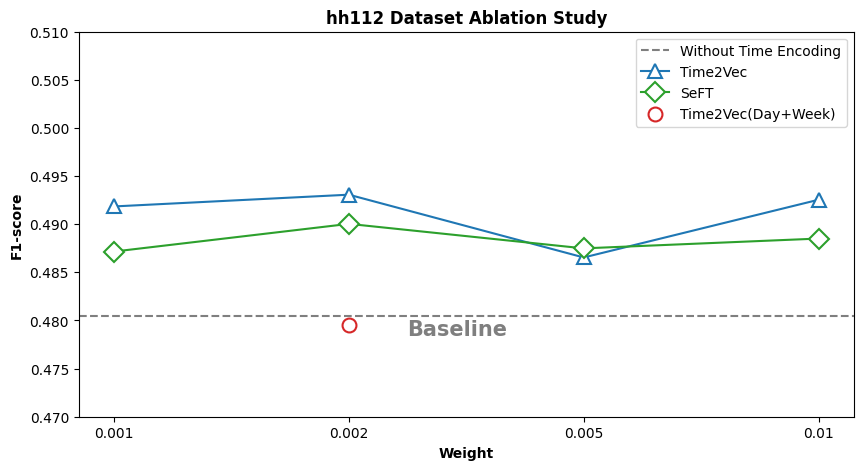

In [246]:
# plot the line graph for f1-score vs weight for lr and setfunc
# treat weight as categorical variable
fig, ax = plt.subplots(figsize=(10, 5))

lr_data['weight'] = lr_data['weight'].astype(str)
setfunc_data['weight'] = setfunc_data['weight'].astype(str)

# add dot for each point
# set line plot as dark red

ax.axhline(y=ftw_data[ftw_data['Experiment'] == 'None']['f1-score'].values[0], color='#7f7f7f', linestyle='--', label='Without Time Encoding')
# add a text of "baseline" at the end of the line
ax.text(1.25, ftw_data[ftw_data['Experiment'] == 'None']['f1-score'].values[0] - 0.002, 'Baseline', color='#7f7f7f', fontweight='bold', fontsize=15)

sns.lineplot(data=lr_data, x="weight", y="f1-score", ax=ax, marker='^', color='#1f77b4', label='Time2Vec', markersize=10, markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#1f77b4')
sns.lineplot(data=setfunc_data, x="weight", y="f1-score", ax=ax, marker='D', color='#2ca02c', label='SeFT', markersize=10, markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#2ca02c')

ax.set_xlabel('Weight')
ax.set_ylabel('F1-score')

# bold the x and y label
ax.xaxis.label.set_weight('bold')
ax.yaxis.label.set_weight('bold')

ax.set_title(dataset_name + ' Dataset Ablation Study', fontweight='bold')

# draw line for the f1-score for Experiment = None

# draw a point for the f1-score for Experiment = d+w at weight = 0.002
# with markersize = 10, markerfacecolor = white, markeredgewidth = 1.5, markeredgecolor = dark red
ax.scatter(x=1.0, y=ftw_data[ftw_data['Experiment'] == 'd+w']['f1-score'].values[0], marker='o', s=100, facecolors='white', edgecolors='#d62728', linewidths=1.5, label='Time2Vec(Day+Week)')

ax.legend()
# set ylim
ax.set_ylim(0.47, 0.51)
# store the figure inside evaluation folder
fig.savefig('evaluation/' + dataset_name + '_ablation.png', dpi=300, bbox_inches='tight')

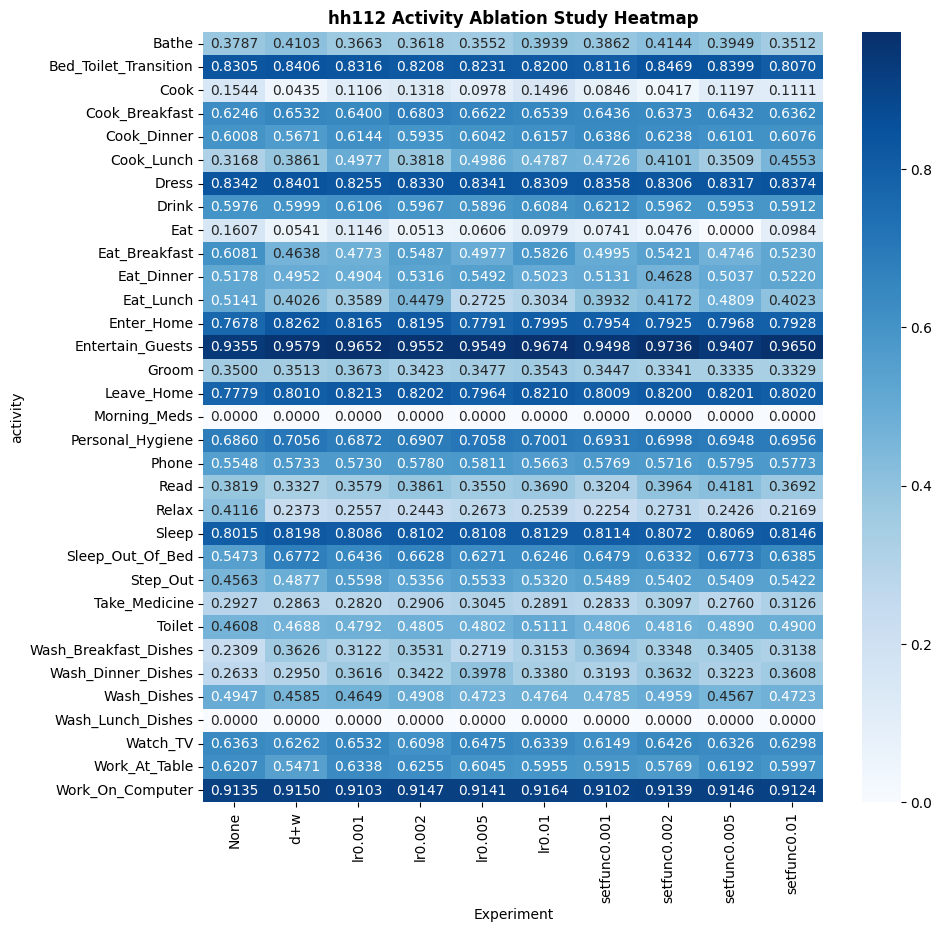

In [247]:
# plot the heatmap for ftw_activities

pivot_ftw_activities = ftw_activities.pivot(index='activity', columns='Experiment', values='f1-score')

# fill the nan by the mean of the row of the activity
# pivot_ftw_activities = pivot_ftw_activities.fillna(pivot_ftw_activities.mean(axis=1), axis=1)
m = pivot_ftw_activities.mean(axis=1)
for i, col in enumerate(pivot_ftw_activities):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    pivot_ftw_activities.iloc[:, i] = pivot_ftw_activities.iloc[:, i].fillna(m)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pivot_ftw_activities, annot=True, fmt='.4f', cmap='Blues', ax=ax)

# save title as dataset name + " Activity Ablation Study Heatmap"
ax.set_title(dataset_name + ' Activity Ablation Study Heatmap', fontweight='bold')

# save the figure inside evaluation folder
fig.savefig('evaluation/' + dataset_name + '_activity_heatmap.png', dpi=300, bbox_inches='tight')

# plot the top 5 

In [248]:
time_ablation_path = '../ftw_model/result_new1/'
time_ablation_exp = ['None', 'lr0.002', 'lr0.005', 'd+w', 'lr0.001', 'lr0.01', 'setfunc0.001', 'setfunc0.002', 'setfunc0.005', 'setfunc0.01']

datasets_name = ['hh102', 'hh112', 'hh109']

time_ablation_f1 = []
time_ablation_activities = []

for dataset_name in datasets_name:
    time_ablation_dir = [os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook{i}_10_32/') for i in range(1, 10)]
    time_ablation_dir.insert(0, os.path.join(time_ablation_path, f'BiLSTM-(fib_{dataset_name})_1d_cnn_overlook_merged_final_10_32/'))
    assert len(time_ablation_dir) == len(time_ablation_exp), f'len(time_ablation_dir) = {len(time_ablation_dir)} and len(time_ablation_exp) = {len(time_ablation_exp)}'


    # Put the name for hh dataset with 101, 103, 116, 119, 121, 122, 123, 126
    for exp, result_dir in zip(time_ablation_exp, time_ablation_dir):

        for i in range(1, 4):
            results_path = result_dir + '/' + str(i)
            if not os.path.isdir(results_path):
                print(results_path)
                continue
            if (os.path.exists(results_path + '/report1.txt')):
                results_path = results_path + '/report1.txt'
            elif os.path.exists(results_path + '/report1.tsv'):
                results_path = results_path + '/report1.tsv'
            else:
                continue

            # find the result name in results_path using regex "hh1[0-9][0-9]"
            res = re.search("hh1[0-9][0-9]", result_dir)
            if res:
                dataset_name = res.group(0)
            else:
                dataset_name = 'unknown'

            results = pd.read_csv(results_path, sep='\t', index_col=0)
            time_ablation_f1.append({'Experiment': exp, 'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

            ############################################################
            results_path = result_dir + '/' + str(i)
            if (os.path.exists(results_path + '/report.txt')):
                activity_path = results_path + '/report.txt'
            elif os.path.exists(results_path + '/report.tsv'):
                activity_path = results_path + '/report.tsv'
            else:
                continue

            activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
            # itetrating over each row and appending the activities
            
            for index, row in activities_result.iterrows():
                if index in ['accuracy', 'macro avg', 'weighted avg']:
                    continue
                time_ablation_activities.append({'Experiment': exp, 'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
time_ablation_activities = pd.DataFrame(time_ablation_activities)
time_ablation_activities = time_ablation_activities.groupby(['Experiment', 'activity']).mean().reset_index()

time_ablation_data = pd.DataFrame(time_ablation_f1)

# fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(data=ftw_data, x="dataset", y="f1-score")

../ftw_model/result_new1/BiLSTM-(fib_hh112)_1d_cnn_overlook3_10_32//2
../ftw_model/result_new1/BiLSTM-(fib_hh109)_1d_cnn_overlook4_10_32//3
../ftw_model/result_new1/BiLSTM-(fib_hh109)_1d_cnn_overlook9_10_32//3


In [249]:
# get the mean and std of f1-score for each experiment
filtered_ablation_data = filtered_ablation_data.groupby(['Experiment', 'dataset']).mean().reset_index()

mean_ablation_data = filtered_ablation_data.groupby(['Experiment']).mean().reset_index()
mean_ablation_data['f1-std'] = filtered_ablation_data.groupby(['Experiment']).std().reset_index()['f1-score']
mean_ablation_data['precision-std'] = filtered_ablation_data.groupby(['Experiment']).std().reset_index()['precision']
mean_ablation_data['recall-std'] = filtered_ablation_data.groupby(['Experiment']).std().reset_index()['recall']

# drop fold column
mean_ablation_data = mean_ablation_data.drop(columns=['fold'])

# set each score to be 3 decimal places and add std to it
mean_ablation_data['f1-score'] = mean_ablation_data['f1-score'].apply(lambda x: f'{x:.4f}')
mean_ablation_data['precision'] = mean_ablation_data['precision'].apply(lambda x: f'{x:.4f}')
mean_ablation_data['recall'] = mean_ablation_data['recall'].apply(lambda x: f'{x:.4f}')
mean_ablation_data['f1-score'] = mean_ablation_data['f1-score'] + '  $\pm$ ' + mean_ablation_data['f1-std'].apply(lambda x: f'{x:.3f}')
mean_ablation_data['precision'] = mean_ablation_data['precision'] + '  $\pm$ ' + mean_ablation_data['precision-std'].apply(lambda x: f'{x:.3f}')
mean_ablation_data['recall'] = mean_ablation_data['recall'] + '  $\pm$ ' + mean_ablation_data['recall-std'].apply(lambda x: f'{x:.3f}')


mean_ablation_data = mean_ablation_data.drop(columns=['f1-std', 'precision-std', 'recall-std'])

mean_ablation_data

,Experiment,f1-score,precision,recall
0,None,0.5545 $\pm$ 0.088,0.6274 $\pm$ 0.068,0.5574 $\pm$ 0.076
1,d+w,0.5599 $\pm$ 0.093,0.6293 $\pm$ 0.076,0.5663 $\pm$ 0.072
2,lr0.001,0.5611 $\pm$ 0.086,0.6413 $\pm$ 0.064,0.5623 $\pm$ 0.067
3,lr0.002,0.5654 $\pm$ 0.086,0.6414 $\pm$ 0.069,0.5653 $\pm$ 0.070
4,lr0.005,0.5598 $\pm$ 0.086,0.6326 $\pm$ 0.068,0.5600 $\pm$ 0.066
5,lr0.01,0.5591 $\pm$ 0.083,0.6257 $\pm$ 0.068,0.5657 $\pm$ 0.057
6,setfunc0.001,0.5560 $\pm$ 0.087,0.6298 $\pm$ 0.058,0.5596 $\pm$ 0.071
7,setfunc0.002,0.5600 $\pm$ 0.085,0.6235 $\pm$ 0.059,0.5669 $\pm$ 0.071
8,setfunc0.005,0.5600 $\pm$ 0.086,0.6212 $\pm$ 0.067,0.5682 $\pm$ 0.066
9,setfunc0.01,0.5592 $\pm$ 0.087,0.6213 $\pm$ 0.060,0.5660 $\pm$ 0.071


In [250]:
# split the experiment name by lr and setfunc and put them in weight column together
mean_ablation_data['weight'] = mean_ablation_data['Experiment'].apply(lambda x: x.split('lr')[1] if 'lr' in x else (x.split('setfunc')[1] if 'setfunc' in x else ''))
mean_ablation_data['Experiment'] = mean_ablation_data['Experiment'].apply(lambda x: 'Time2Vec' if 'lr' in x else ('SeFT' if 'setfunc' in x else x))

# set the weight for experiment = d+w be (0.002, 0.0001)
mean_ablation_data.loc[mean_ablation_data['Experiment'] == 'd+w', 'weight'] = '(0.002, 0.0001)'

# set the weight for experiment = None by '-'
mean_ablation_data.loc[mean_ablation_data['Experiment'] == 'None', 'weight'] = '-'

# rename the experiment name for d+w be Day+Week
mean_ablation_data.loc[mean_ablation_data['Experiment'] == 'd+w', 'Experiment'] = 'Day+Week'

# rearrange the columns
mean_ablation_data = mean_ablation_data[['Experiment', 'weight', 'f1-score', 'precision', 'recall']]

# add \textbf for the max among the f1-score, precision and recall
mean_ablation_data['f1-score'] = mean_ablation_data['f1-score'].apply(lambda x: '\\textbf{' + x + '}' if x == mean_ablation_data['f1-score'].max() else x)
mean_ablation_data['precision'] = mean_ablation_data['precision'].apply(lambda x: '\\textbf{' + x + '}' if x == mean_ablation_data['precision'].max() else x)
mean_ablation_data['recall'] = mean_ablation_data['recall'].apply(lambda x: '\\textbf{' + x + '}' if x == mean_ablation_data['recall'].max() else x)

# add citation after time2vec and seft
mean_ablation_data['Experiment'] = mean_ablation_data['Experiment'].apply(lambda x: x + '\\cite{time2vec}' if x == 'Time2Vec' else (x + '\\cite{DBLP:journals/corr/abs-1909-12064}' if x == 'SeFT' else x))

mean_ablation_data = mean_ablation_data.reindex([0, 2, 3, 4, 5, 1, 6, 7, 8, 9])

# print(mean_ablation_data.to_latex(index=False, escape=False))

# add a column for period
mean_ablation_data['period'] = mean_ablation_data['Experiment'].apply(lambda x: 'Daily' if (x != 'Day+Week' and x != 'None') else ('Daily + Weekly' if x == 'Day+Week' else '-'))

# rename experiment day+week be time2vec\cite{time2vec}
mean_ablation_data.loc[mean_ablation_data['Experiment'] == 'Day+Week', 'Experiment'] = 'Time2Vec\\cite{time2vec}'

# rearraange the columns
mean_ablation_data = mean_ablation_data[['Experiment', 'period', 'weight', 'f1-score', 'precision', 'recall']]

# Rename the columns be uppercase for the first letter
mean_ablation_data.columns = ['Experiment', 'Period', 'Weight', 'F1-score', 'Precision', 'Recall']

# bold the column name
mean_ablation_data.columns = ['\\textbf{' + col + '}' for col in mean_ablation_data.columns]

print(mean_ablation_data.to_latex(index=False, escape=False))
mean_ablation_data

\begin{tabular}{llllll}
\toprule
                         \textbf{Experiment} & \textbf{Period} & \textbf{Weight} &            \textbf{F1-score} &           \textbf{Precision} &              \textbf{Recall} \\
\midrule
                                        None &               - &               - &          0.5545  $\pm$ 0.088 &          0.6274  $\pm$ 0.068 &          0.5574  $\pm$ 0.076 \\
                     Time2Vec\cite{time2vec} &           Daily &           0.001 &          0.5611  $\pm$ 0.086 &          0.6413  $\pm$ 0.064 &          0.5623  $\pm$ 0.067 \\
                     Time2Vec\cite{time2vec} &           Daily &           0.002 & \textbf{0.5654  $\pm$ 0.086} & \textbf{0.6414  $\pm$ 0.069} &          0.5653  $\pm$ 0.070 \\
                     Time2Vec\cite{time2vec} &           Daily &           0.005 &          0.5598  $\pm$ 0.086 &          0.6326  $\pm$ 0.068 &          0.5600  $\pm$ 0.066 \\
                     Time2Vec\cite{time2vec} &           Daily &         

,\textbf{Experiment},\textbf{Period},\textbf{Weight},\textbf{F1-score},\textbf{Precision},\textbf{Recall}
0,None,-,-,0.5545 $\pm$ 0.088,0.6274 $\pm$ 0.068,0.5574 $\pm$ 0.076
2,Time2Vec\cite{time2vec},Daily,0.001,0.5611 $\pm$ 0.086,0.6413 $\pm$ 0.064,0.5623 $\pm$ 0.067
3,Time2Vec\cite{time2vec},Daily,0.002,\textbf{0.5654 $\pm$ 0.086},\textbf{0.6414 $\pm$ 0.069},0.5653 $\pm$ 0.070
4,Time2Vec\cite{time2vec},Daily,0.005,0.5598 $\pm$ 0.086,0.6326 $\pm$ 0.068,0.5600 $\pm$ 0.066
5,Time2Vec\cite{time2vec},Daily,0.01,0.5591 $\pm$ 0.083,0.6257 $\pm$ 0.068,0.5657 $\pm$ 0.057
1,Time2Vec\cite{time2vec},Daily + Weekly,"(0.002, 0.0001)",0.5599 $\pm$ 0.093,0.6293 $\pm$ 0.076,0.5663 $\pm$ 0.072
6,SeFT\cite{DBLP:journals/corr/abs-1909-12064},Daily,0.001,0.5560 $\pm$ 0.087,0.6298 $\pm$ 0.058,0.5596 $\pm$ 0.071
7,SeFT\cite{DBLP:journals/corr/abs-1909-12064},Daily,0.002,0.5600 $\pm$ 0.085,0.6235 $\pm$ 0.059,0.5669 $\pm$ 0.071
8,SeFT\cite{DBLP:journals/corr/abs-1909-12064},Daily,0.005,0.5600 $\pm$ 0.086,0.6212 $\pm$ 0.067,\textbf{0.5682 $\pm$ 0.066}
9,SeFT\cite{DBLP:journals/corr/abs-1909-12064},Daily,0.01,0.5592 $\pm$ 0.087,0.6213 $\pm$ 0.060,0.5660 $\pm$ 0.071


In [160]:
print(mean_ablation_data.to_latex(index=False, escape=False))

\begin{tabular}{llllll}
\toprule
                                  Experiment &         Period &          Weight &                     F1-score &                    Precision &                       Recall \\
\midrule
                                        None &              - &               - &          0.5745  $\pm$ 0.069 &          0.6274  $\pm$ 0.068 &          0.5574  $\pm$ 0.076 \\
                     Time2Vec\cite{time2vec} &          Daily &           0.001 &          0.5811  $\pm$ 0.066 &          0.6413  $\pm$ 0.064 &          0.5623  $\pm$ 0.067 \\
                     Time2Vec\cite{time2vec} &          Daily &           0.002 & \textbf{0.5854  $\pm$ 0.067} & \textbf{0.6414  $\pm$ 0.069} &          0.5653  $\pm$ 0.070 \\
                     Time2Vec\cite{time2vec} &          Daily &           0.005 &          0.5798  $\pm$ 0.066 &          0.6326  $\pm$ 0.068 &          0.5600  $\pm$ 0.066 \\
                     Time2Vec\cite{time2vec} &          Daily &            0.0

In [ ]:
# get the mean of f1-score for each experiment
ftw_data = ftw_data.groupby(['Experiment']).mean().reset_index()
# drop the setfunc0.001
# ftw_data = ftw_data.drop([6])

# drop the fold column
ftw_data = ftw_data.drop(columns=['fold'])

# print(ftw_data.round(4).to_latex())
ftw_data

,Experiment,f1-score,precision,recall
0,None,0.636014,0.674627,0.630607
1,d+w,0.643641,0.673078,0.635185
2,lr0.001,0.642501,0.689908,0.629111
3,lr0.002,0.644376,0.686426,0.635236
4,lr0.005,0.635977,0.684505,0.620229
5,lr0.01,0.637057,0.677825,0.620914
6,setfunc0.001,0.640213,0.675407,0.633404
7,setfunc0.002,0.638154,0.662470,0.638041
8,setfunc0.005,0.638784,0.669744,0.632315


In [11]:
# split the ftw_data by experiment name, spliting "lr" and "setfunc"
lr_data = ftw_data[ftw_data['Experiment'].str.contains('lr')]
setfunc_data = ftw_data[ftw_data['Experiment'].str.contains('setfunc')]


# parse the weight from the experiment name
lr_data['weight'] = lr_data['Experiment'].str.split('lr').str[1].astype(float)
setfunc_data['weight'] = setfunc_data['Experiment'].str.split('setfunc').str[1].astype(float)


/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/simon/miniconda3/envs/casas/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
